In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Decibels vs. Percentages

Percentages are simple, right? I bought four oranges. I ate two. What percentage of the original four do I have left? 50%. Easy.

How many decibels down in oranges am I? Not so easy, eh? Well the answer is 3. Skim the rest of this notebook to find out why.

### Percentage:
The prefix <code>cent</code> indicates one hundred. For example: one <b>cent</b>ury is equal to one-hundred years. Percentage is simply a ratio of numbers compared to the number one-hundred, hence "per-cent", or "per one hundred".

In [2]:
# percentage function, v = new value, r = reference value
def perc(v,r):
    return 100 * (v / r)

Let's now formalize our oranges percentage answer from above:

In [3]:
original = 4
uneaten = 2
print("You're left with", perc(uneaten, original), "% of the original oranges.")

You're left with 50.0 % of the original oranges.


### Decibels:
A decibel is simply a different way to represent the ratio of two numbers. It's based on a logrithmic calculation, as to compare values with large variance and small variance on the same scale (more on this below).
<br><i>For an entertainingly complete history about how decibels were decided upon, read the <a href="https://en.wikipedia.org/wiki/Decibel" target="_blank">Wikipedia article.</a></i>

In [4]:
# decibel function, v = new value, r = reference value
def deci(v,r):
    return 10 * math.log(v / r, 10)

Let's now formalize our oranges decibel answer from above:

In [5]:
print("After lunch you have", round( deci(uneaten, original), 2), "decibels less oranges.")

After lunch you have -3.01 decibels less oranges.


That's it. Simply calculate the log to base ten of the ratio and multiply by ten.

<hr>
# Advanced Part
<hr>

Well <b>who cares?</b> I'm just going to use percentages. They're easier to calculate and I don't have to relearn my forgotten-for-decades logarithms.
<br>True, most people use percentages because that's what everyone else does. However, I suggest that decibel loss is a more powerful and perceptively accurate representation of ratios.

### Large ratios - small ratios
Imagine you started with four oranges, and had somehow gained three million oranges. Sitting in the middle of your grove, you'd be left with a fairly cumbersome percentage to express:

In [6]:
perc(3000000, original)

75000000.0

"I have seventy five million percent of my original oranges." Yikes. What does that even mean? Use decibels instead:

In [7]:
deci(3000000, original)

58.750612633917

"I've gained fifty-nine decibels of oranges."

### Negative ratios
Additionally, the decibel scale automatically expresses positive and negative ratios.

In [8]:
# Less oranges than original number
print(deci(uneaten, original))
print(perc(uneaten, original))

-3.0102999566398116
50.0


In [9]:
# More oranges than original number
print(deci(8, original))
print(perc(8, original))

3.0102999566398116
200.0


### Greater than 100% ratios
There's some ambiguity when a person states she has 130% more oranges than her original number. Does this mean she has 5.2 oranges (which is 30% more than 4 oranges)?

In [10]:
perc(5.2, original)

130.0

 Does she have 9.2 oranges (which is 130% more than 4 oranges)?

In [11]:
perc(9.2, original)

229.99999999999997

Expressed in decibel format, the answer is clear:

In [12]:
deci(5.2, original)

1.1394335230683676

She's gained 1.1 decibels in orange holdings.

# How do they stack up?

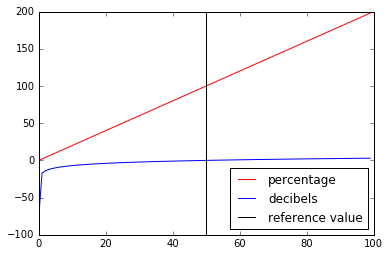

In [13]:
width = 100
center = 50
ref = center

percplot = np.zeros(width)
deciplot = np.zeros(width)

for i in range(width):
    val = center - (width/2) + i
    if val == 0:
        val = 0.000001
    percplot[i] = perc(val, ref)
    deciplot[i] = deci(val, ref)
plt.plot(range(width), percplot, 'r', label="percentage")
plt.plot(range(width), deciplot, 'b', label="decibels")
plt.plot((ref,ref), (-100,percplot[width-1]), 'k', label="reference value")
plt.legend(loc=4)
plt.show()
#plt.savefig('linear_plot.png', dpi=150)

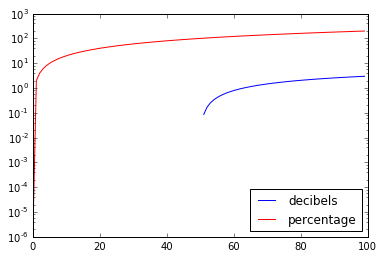

In [14]:
plt.semilogy(range(width), deciplot, 'b', label="decibels")
plt.semilogy(range(width), percplot, 'r', label="percentage")
plt.legend(loc=4)
plt.show()
#plt.savefig('log_plot.png', dpi=150)